In [1]:
import pandas as pd
import io
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io import wavfile 

# Einlesen Daten

In [2]:
sel = "Bogengeräusche"
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Bogengeräusche\\N81_602HS_002_2016-10-15_20-06-17_01.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Bogengeräusche\\N81_602HS_002_2016-10-21_17-14-47_01.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")

samplerate = 50000
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

In [3]:
sel = "Flachstellen Variante Güterzug"
samplerate, dataNormal = wavfile.read('.\Flachstellen\\2015-05-26_03-05-08_01.ZS.txt.wav')
samplerate, dataAuffällig = wavfile.read('.\Flachstellen\\2015-05-26_00-49-13_01.ZS.txt.wav')

samplerate = 51200

In [4]:
sel = "Mikrophon Deffekt (Membran)"
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Sensorfehler Membran\\G1_2019-04-30_05-53-10_01.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Sensorfehler Membran\\G1_2019-04-30_05-53-10_02.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
samplerate = 51200
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

In [5]:
sel = "Mikrophon Deffekt (Membran) Variante 1 (weniger Pegeldiff)"
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Sensorfehler Membran\\G1_2019-04-29_12-03-14_01.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Sensorfehler Membran\\G1_2019-04-29_12-03-14_02.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
samplerate = 51200
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

In [6]:
sel = "Mikrophon Deffekt (Membran) Variante 2 (weniger Pegeldiff)"
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Sensorfehler Membran\\G1_2019-04-29_12-16-37_01.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Sensorfehler Membran\\G1_2019-04-29_12-16-37_02.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
samplerate = 51200
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

In [7]:
sel = "Beschleunigungsaufnehmer Deffekt"
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Sensorfehler Membran\\G1_2019-04-30_05-53-10_04.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Sensorfehler Membran\\G1_2019-05-15_15-27-02_04.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
samplerate = 51200
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

In [8]:
sel = "Annenheim (Beschleunigungen)"
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Fehler Beschleunigungen (2020-915)\\Gleis1_2021-03-10_15-56-05_04.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Fehler Beschleunigungen (2020-915)\\Gleis1_2021-03-10_15-56-05_03.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
samplerate = 51200
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

# Auswertungen

Das ist Wavefile Nr. 1 - Unauffällig


Das ist Wavefile Nr. 2 - Auffällig


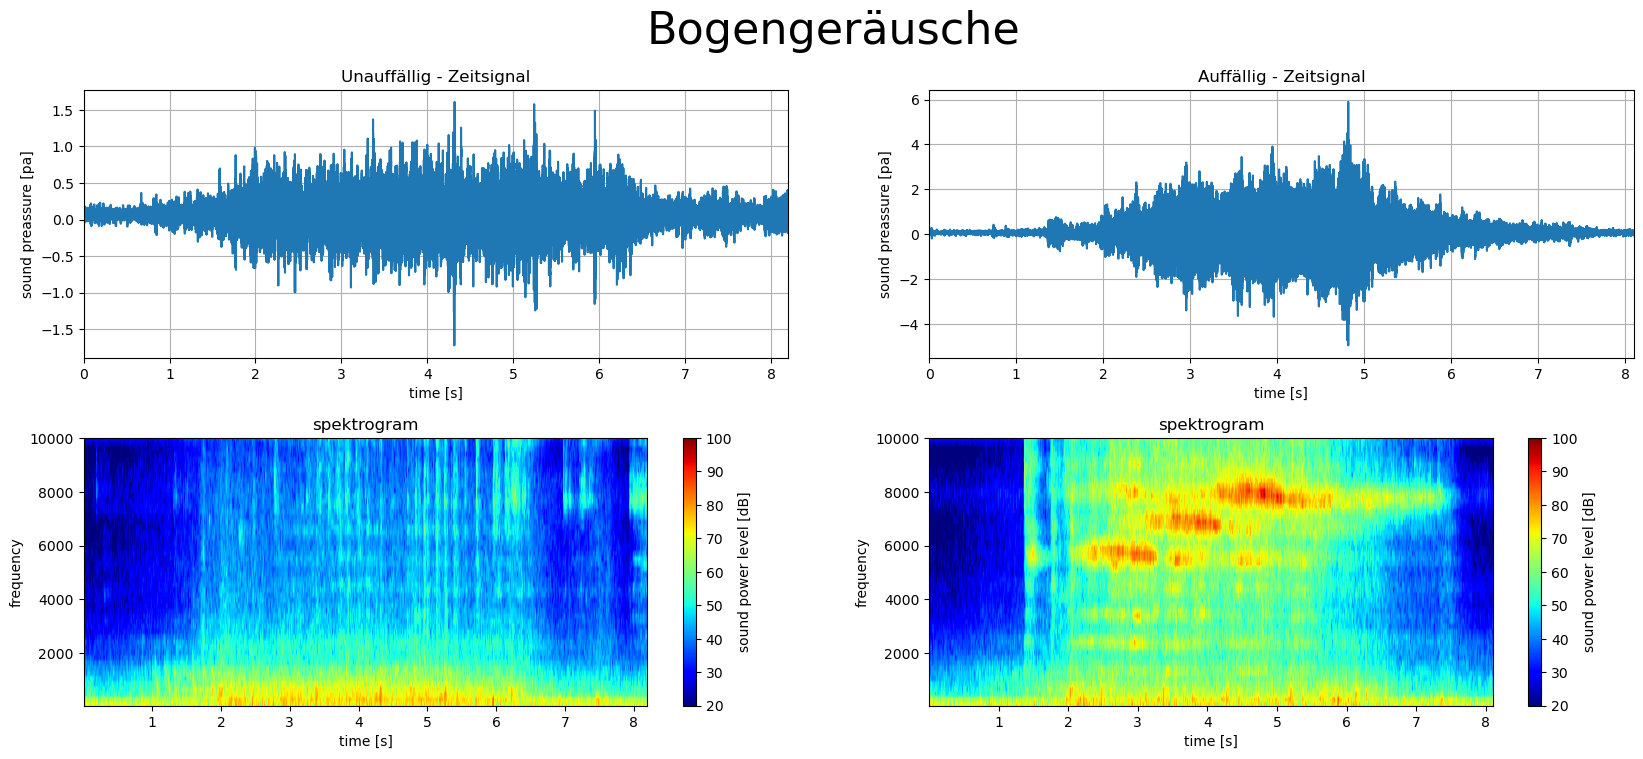

In [3]:
# ffff
fig = plt.figure(figsize=(20,8))
plt.suptitle(sel, fontsize=32)
plt.subplot(2,2,1)
plt.title("Unauffällig - Zeitsignal")
plt.xlabel("time [s]")
plt.ylabel("sound preassure [pa]")
plt.grid()
plt.margins(x = 0)
time = np.linspace(0., dataNormal.shape[0]/samplerate, dataNormal.shape[0])
plt.plot(time,dataNormal)


plt.subplot(2,2,2)
plt.title("Auffällig - Zeitsignal")
plt.xlabel("time [s]")
plt.ylabel("sound preassure [pa]")
plt.grid()
plt.margins(x = 0)
time = np.linspace(0., dataAuffällig.shape[0]/samplerate, dataAuffällig.shape[0])
plt.plot(time,dataAuffällig)

plt.subplot(2,2,3)
plt.title("spektrogram")
plt.xlabel("time [s]")
plt.ylabel("frequency")
pxx, freq, t, cax = plt.specgram(dataNormal/0.00002, Fs= samplerate, scale = 'dB',  mode = 'magnitude',vmin = 20.0,vmax=100.0, cmap = 'jet')
plt.ylim(50,10000)
plt.colorbar(cax).set_label('sound power level [dB]')

plt.subplot(2,2,4)
plt.title("spektrogram")
plt.xlabel("time [s]")
plt.ylabel("frequency")
pxx, freq, t, cax = plt.specgram(dataAuffällig/0.00002, Fs= samplerate, scale = 'dB',  mode = 'magnitude',vmin = 20.0,vmax=100.0, cmap = 'jet')
plt.ylim(50,10000)
plt.colorbar(cax).set_label('sound power level [dB]')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

print("Das ist Wavefile Nr. 1 - Unauffällig")
ipd.display(ipd.Audio(data=dataNormal,rate= samplerate))

print("Das ist Wavefile Nr. 2 - Auffällig")
ipd.display(ipd.Audio(data=dataAuffällig,rate= samplerate))


# Codeschnipsel

In [10]:
#Find Sampling Rate
dfAuffällig.loc[dfAuffällig["time"]>=1,"time"]

51199     1.000000
51200     1.000020
51201     1.000039
51202     1.000059
51203     1.000078
            ...   
348155    6.799922
348156    6.799941
348157    6.799961
348158    6.799980
348159    6.800000
Name: time, Length: 296961, dtype: float64

In [11]:
 #create .wav file
 import scipy
 from scipy.io import wavfile 
 scipy.io.wavfile.write("testwavfile.wav", 52000, df2["pressure"])


NameError: name 'df2' is not defined

In [12]:
# Read .wav File
samplerate, data = wavfile.read("/content/testwavfile.wav")

print(f"number of channels = {data.shape[0]}")

length = data.shape[0] / samplerate

print(f"length = {length}s")


FileNotFoundError: [Errno 2] No such file or directory: '/content/testwavfile.wav'

In [13]:
#(Flachstelle) Aber beide Auffällig
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Velden Kriechstrom\\N81_503VD_002_2021-06-01_20-07-05_01.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Velden Kriechstrom\\N81_503VD_002_2021-06-01_20-07-05_05.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
samplerate = 32000
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

FileNotFoundError: [Errno 2] No such file or directory: '.\\Velden Kriechstrom\\N81_503VD_002_2021-06-01_20-07-05_01.ZS.txt'

In [14]:
#Flachstellen Variante Personenzug
samplerate, dataNormal = wavfile.read('.\Flachstellen\\2015-05-26_06-10-28_01.ZS.txt.wav')
samplerate, dataAuffällig = wavfile.read('.\Flachstellen\\2015-05-26_05-50-21_01.ZS.txt.wav')

samplerate = 51200

FileNotFoundError: [Errno 2] No such file or directory: '.\\Flachstellen\\2015-05-26_06-10-28_01.ZS.txt.wav'

In [64]:
#Mikrophon deffekt(Kriechstrom) Zug1
colnames=['time', 'pressure'] 
dfNormal = pd.read_csv('.\Velden Kriechstrom\\N81_503VD_001_2021-06-01_10-38-45_01.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
dfAuffällig = pd.read_csv('.\Velden Kriechstrom\\N81_503VD_001_2021-06-01_10-38-45_05.ZS.txt',sep="\t",names=colnames,header=None,decimal=",")
samplerate = 32000
dataNormal = dfNormal["pressure"]
dataAuffällig = dfAuffällig["pressure"]

In [166]:
#Change Sampling rate and create .wav file
import librosa
import soundfile as sf


data_22k = librosa.resample(data, samplerate, 22050)

sf.write('testwavfile2.wav', data_22k, 22050, subtype='PCM_24')



In [ ]:
# generate a 1kHz sine wave
fs = 32e3
t = np.arange(0, 15, 1.0/fs)
f0 = 1e3
A = 1
x = A*np.sin(2*np.pi*f0*t)

fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis')
vmin = 20*np.log10(np.max(x)) - 40  # hide anything below -40 dBc
cmap.set_under(color='k', alpha=None)

NFFT = 256
pxx,  freq, t, cax = ax.specgram(x/(NFFT/2), Fs=fs, mode='magnitude',
                                 NFFT=NFFT, noverlap=NFFT/2,
                                 vmin=vmin, cmap=cmap)
fig.colorbar(cax)

print(np.max(pxx))


In [ ]:
print("Das ist Wavefile Nr. 1")
ipd.display(ipd.Audio(data=data,rate= samplerate))

fig1 = plt.figure()
#fig2 = plt.figure()

ax1 = fig1.add_subplot(211)
ax1.set_title("time signal")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("sound preassure [pa]")
ax1.margins(x=0.01)
ax1.grid()
time = np.linspace(0., length, data.shape[0])

ax1.plot(time, data)

ax2 = fig1.add_subplot(212)
ax2.set_title("spektrogram")
ax2.set_xlabel("time")
ax2.set_ylabel("frequency")
ax2.set_ylim(50,20000)

#vmin = 20*np.log10(np.max(data)) - 40  # hide anything below -40 dBc
pxx, freq, t, cax = ax2.specgram(data/0.00002, Fs= samplerate, scale = 'dB',  mode = 'magnitude',vmin = 20.0,vmax=100.0, cmap = 'jet')
ax2.set_ylim(50,10000)

fig1.colorbar(cax).set_label('sound power level [dB]')
plt.subplots_adjust(left=0.5, right=2, top=2, bottom=0.1)

#ipd.Audio(data=data,rate= samplerate)
print("Das ist Wavefile Nr. 2")
ipd.display(ipd.Audio(data=data,rate= samplerate))

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
!pip install librosa